<h1 > 
    <center> Project - Data Mining
    </center>
</h1>

<h2> 
    <center> Problem 1: Clustering
    </center>
</h2>

**1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).**

In [7]:
df_1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [8]:
df_1.shape

(210, 7)

In [9]:
df_1.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [10]:
df_1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


<AxesSubplot:>

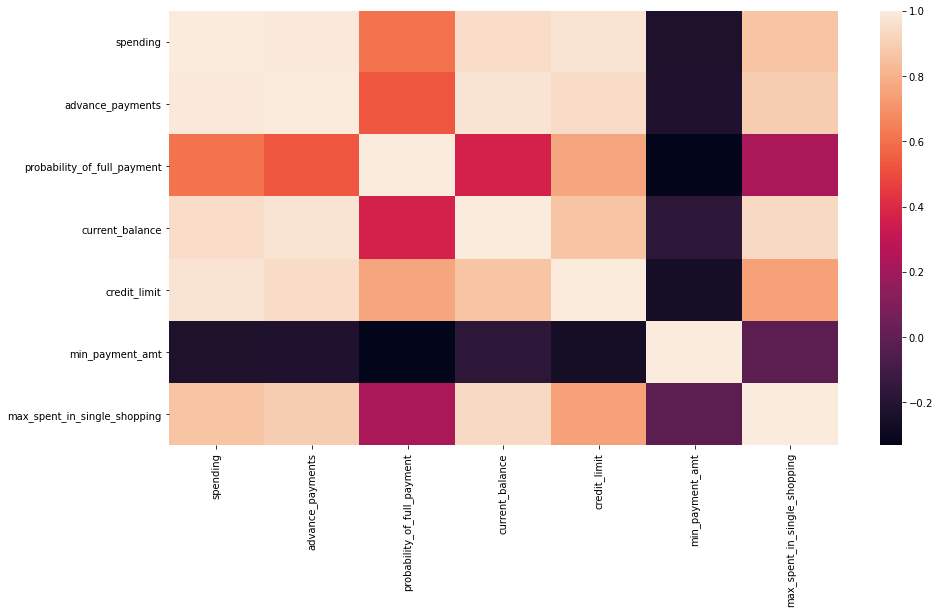

In [25]:
plt.subplots(figsize= (15,8))
sns.heatmap(df_1.corr())

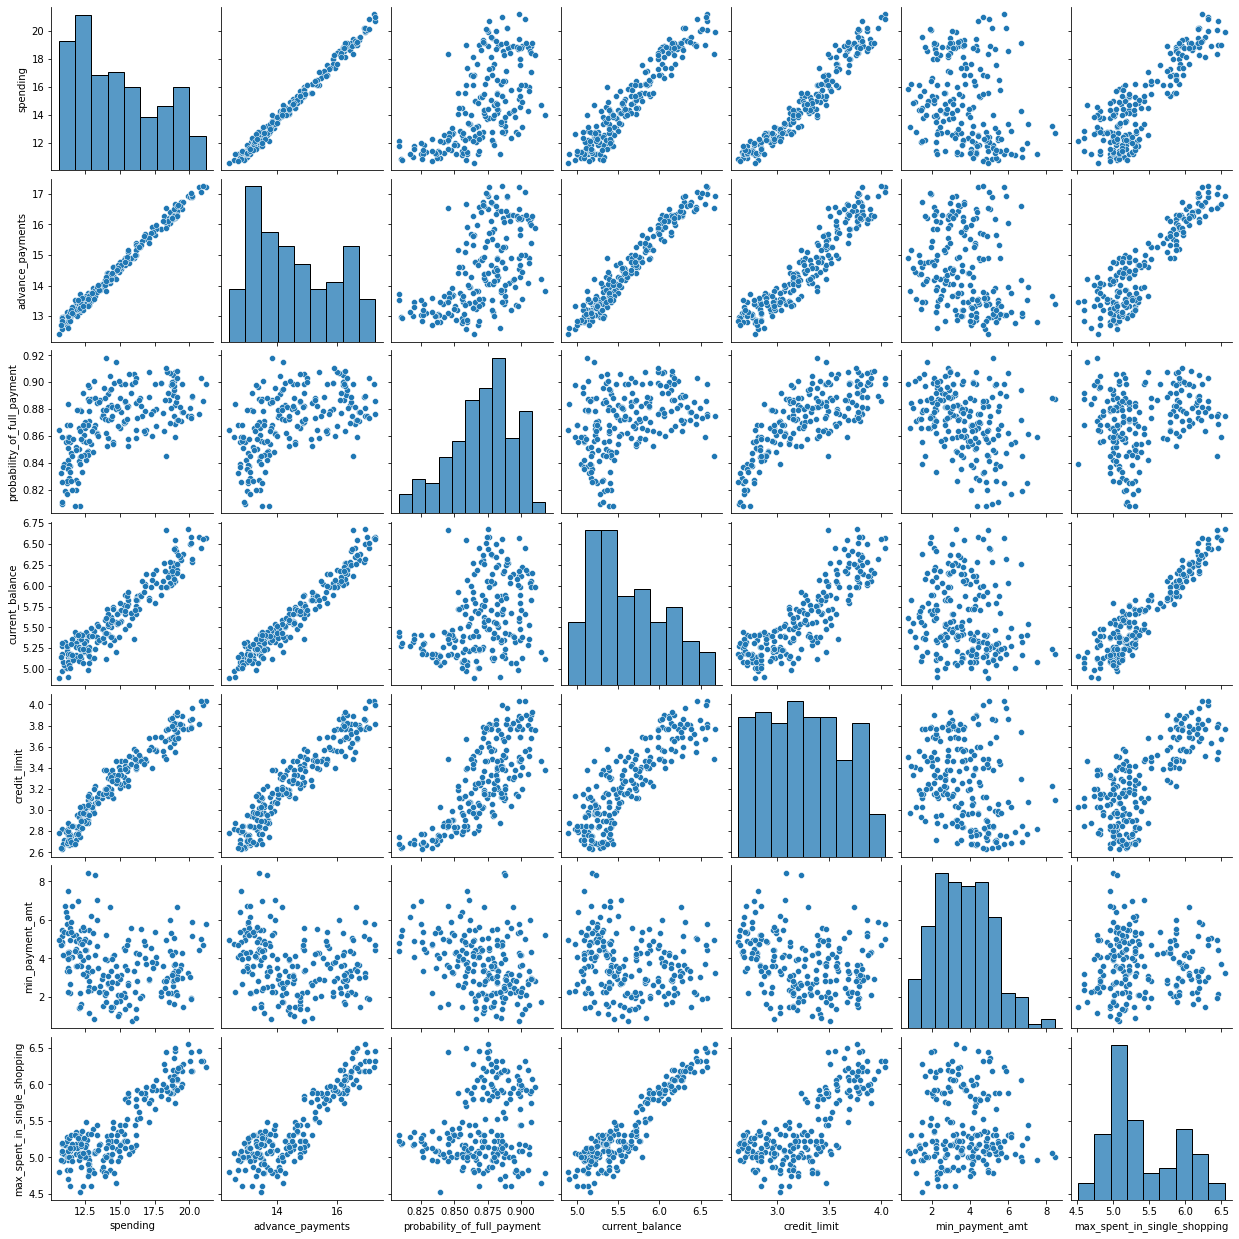

In [26]:
sns.pairplot(data = df_1)
plt.show()

<AxesSubplot:>

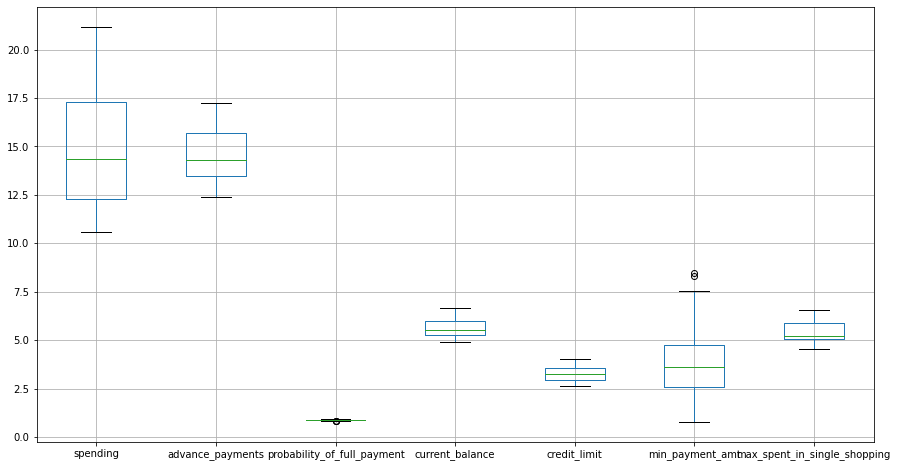

In [20]:
df_1.boxplot(figsize= (15,8))

**1.2  Do you think scaling is necessary for clustering in this case? Justify**

**1.2 Inference:** Yes I beleive that clustering is required in this case for the following reasons:
 - Scaling is necessary in this case as the values vary a lot by scale in different columns. Certain values are in decimals, whereas certain values are in double digits. 
 - Normalizing the data leads to better clustering. 

**1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them**

In [29]:
scaled_df_1 = pd.DataFrame(X.fit_transform(df_1), columns=df_1.columns)

In [30]:
scaled_df_1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [32]:
wardlink = linkage(scaled_df_1, method = 'ward')

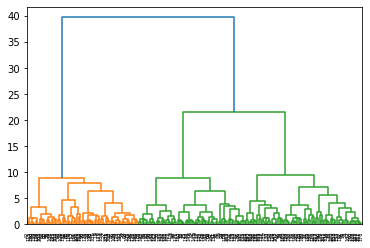

In [33]:
dend = dendrogram(wardlink)

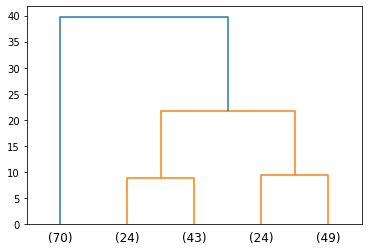

In [34]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 5,
                 )

In [37]:
clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

**1.3 Inference:** The optimal number of clusters is 2

**1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.** 

In [42]:
k_means = KMeans(n_clusters = 2,random_state=1)

In [44]:
k_means.fit(scaled_df_1)

KMeans(n_clusters=2, random_state=1)

In [45]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [46]:
wss =[]

In [48]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df_1)
    wss.append(KM.inertia_)

In [49]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.29354819439664,
 327.55521940626613,
 289.42530694598116,
 262.25851135061475,
 240.01730394201434,
 223.6400463892972,
 206.22762187342786]

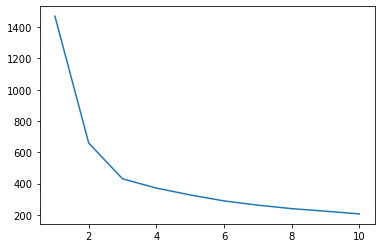

In [50]:
plt.plot(range(1,11), wss)

In [53]:
silhouette_score(scaled_df_1,labels,random_state=1)

0.4007270552751299

**1.4 Inference:** The optimal number of clusters is 3.

**1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.** 

**1.5 Inference:** 

Cluster Profile 0: Has medium spending, hence campaigns should be made in a way accounting for the same.
Cluster Profile 1: Has low spending, hence campaigns should be made in a way accounting for the same. Lower end products can be targeted for Cluster 1.
Cluster Profile 2: Has high spending, high probability of full payment hence campaigns should be made in a way accounting for the same. Higher end products can be targeted for Cluster 2. 

<h2> 
    <center> Problem 2: CART-RF-ANN
    </center>
</h2>

**2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).** 

In [6]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [7]:
df.shape

(3000, 10)

In [8]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [9]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


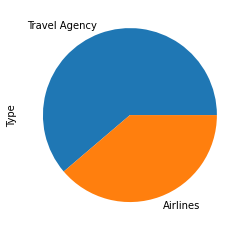

In [10]:
df.Type.value_counts(normalize=True).plot.pie()
plt.show()

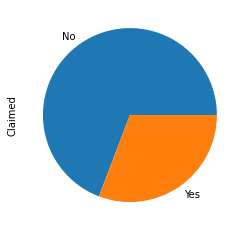

In [11]:
df.Claimed.value_counts(normalize=True).plot.pie()
plt.show()

C:\Users\Yash Joshi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


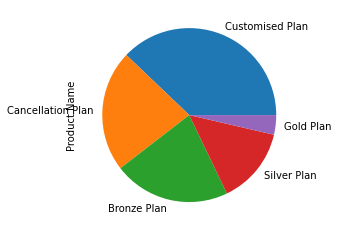

In [12]:
df['Product Name'].value_counts(normalize=True).plot.pie()
plt.show()

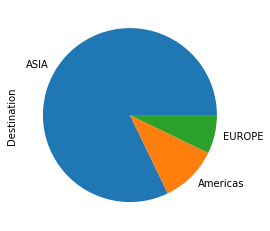

In [13]:
df.Destination.value_counts(normalize=True).plot.pie()
plt.show()

<AxesSubplot:>

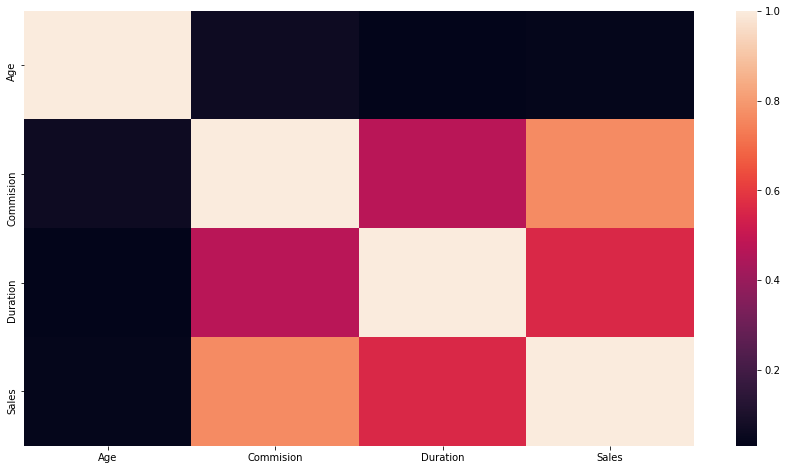

In [14]:
plt.subplots(figsize= (15,8))
sns.heatmap(df.corr())

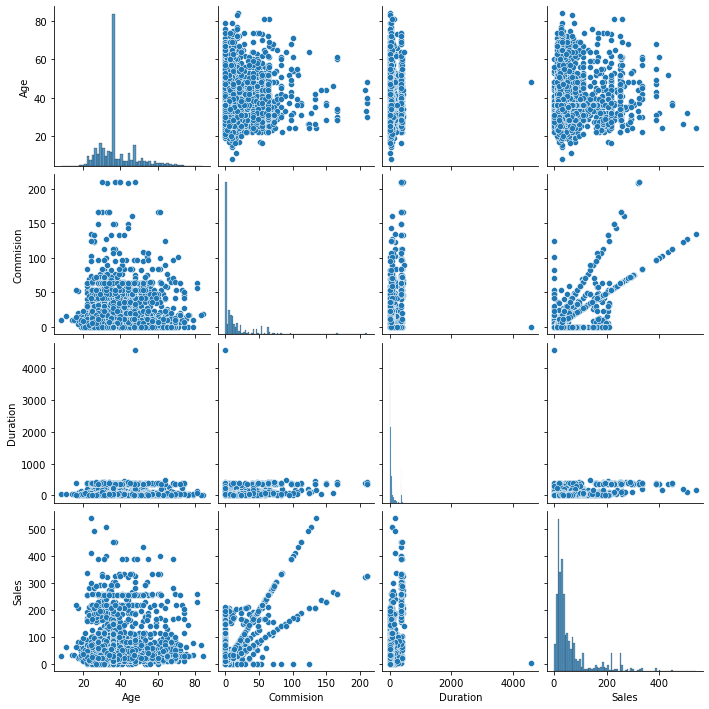

In [15]:
sns.pairplot(data = df)
plt.show()

<AxesSubplot:>

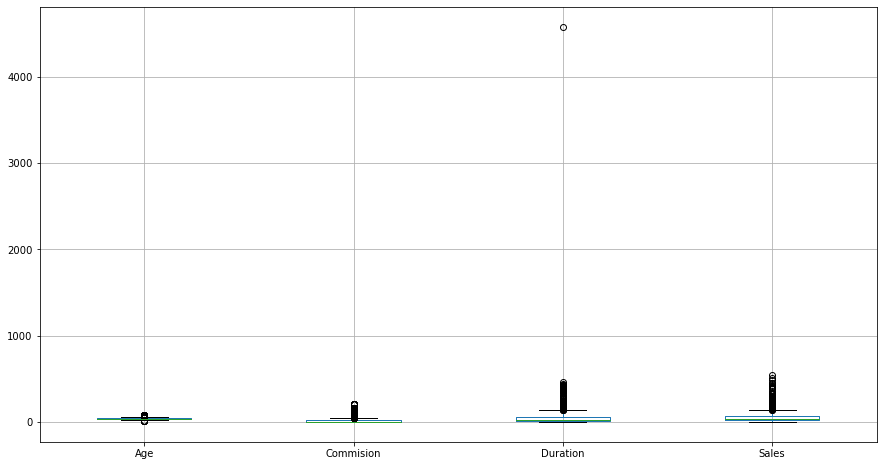

In [16]:
df.boxplot(figsize= (15,8))

**2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network**

**2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.**

**Building a Decision Tree Classifier**

In [119]:
print(pd.DataFrame(dt_model.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.255256
Sales         0.224921
Age           0.199497
Agency_Code   0.166962
Commision     0.087446
Product Name  0.033870
Destination   0.028140
Channel       0.003908
Type          0.000000


In [134]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True) 
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2) 
cart_train_recall=round(df.loc["1"][1],2) 
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision) 
print ('cart train recall ',cart_train_recall)
print ('cart train f1 ',cart_train_f1)

cart_train_precision  0.69
cart train recall  0.58
cart train f1  0.63


In [131]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True) 
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2) 
cart_test_recall=round(df.loc["1"][1],2) 
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision',cart_test_precision) 
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision 0.68
cart_test_recall  0.57
cart_test_f1  0.62


**Building a Random Forest Classifier**

In [157]:
best_grid = RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
min_samples_split=50, n_estimators=300, random_state=1)

best_grid.fit(X_train, train_labels)

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=50, n_estimators=300, random_state=1)

In [161]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True) 
df=pd.DataFrame(rf_metrics).transpose()
rf_train_f1=round(df.loc["1"][2],2) 
rf_train_recall=round(df.loc["1"][1],2) 
rf_train_precision=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision) 
print ('rf train recall ',rf_train_recall)
print ('rf train f1 ',rf_train_f1)

rf_train_precision  0.75
rf train recall  0.61
rf train f1  0.67


In [163]:
rf=classification_report(test_labels, ytest_predict,output_dict=True) 
df=pd.DataFrame(rf).transpose()
rf_test_precision=round(df.loc["1"][0],2) 
rf_test_recall=round(df.loc["1"][1],2) 
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision',rf_test_precision) 
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision 0.69
rf_test_recall  0.57
rf_test_f1  0.62


**Building a Neural Network Classifier**

In [31]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True) 
df=pd.DataFrame(nn_metrics).transpose() 
nn_train_precision=round(df.loc["1"][0],2) 
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn train precision ',nn_train_precision) 
print ('nn train recall ',nn_train_recall)
print ('nn train f1 ',nn_train_f1)

nn train precision  0.66
nn train recall  0.55
nn train f1  0.6


In [32]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True) 
df=pd.DataFrame(nn_metrics).transpose() 
nn_test_precision=round(df.loc["1"][0],2) 
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn test precision ',nn_test_precision) 
print ('nn test recall ',nn_test_recall)
print ('nn test f1 ',nn_test_f1)

nn test precision  0.67
nn test recall  0.52
nn test f1  0.59


**2.4 Final Model: Compare all the models and write an inference which model is best/optimized.**

Comparing the precision, recall and F1 scores:
Out of all of the model Random Forest Classifier is the best suited for this dataset.

**2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations**

The company should implement Random Forest Classifier method.